In [78]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import parse
import datetime



In [138]:
path = "/Volumes/8TB Seagate/PhD Data/profiles/"
kyotoDstFile = path+"kyotoDst.txt"
aerDstFile = path+"Dst"

DstFile = kyotoDstFile; dstname='kyoto'
DstFile = aerDstFile; dstname='aer'




In [139]:
with open(DstFile, "rb") as content_file:
    content = content_file.readlines()
    
content = content[5:]

In [140]:
dst_l = []
dt_l = []
for l in content:
    print (l)
    try:
        dt,_,_,_,dst = parse.parse("{:ti}{:s}{:g}{:s}{:g}", l)
    except:
        _,dt,_,dst = parse.parse("{:s}{:ti}{:s}{:g}", l)
    dst_l.append(dst)
    dt_l.append(dt)
    

  2013-10-01  00:11:34     6.568

  2013-10-01  00:24:29     7.487

  2013-10-01  00:37:14     8.049

  2013-10-01  00:49:49     8.047

  2013-10-01  01:02:40     7.776

  2013-10-01  01:15:25     7.809

  2013-10-01  01:28:19     8.682

  2013-10-01  01:41:04     9.764

  2013-10-01  01:53:42    11.037

  2013-10-01  02:06:35    11.254

  2013-10-01  02:19:19    11.525

  2013-10-01  02:32:13    12.091

  2013-10-01  02:45:04    14.796

  2013-10-01  02:57:44    15.411

  2013-10-01  03:10:37    16.042

  2013-10-01  03:23:23    17.045

  2013-10-01  03:36:07    16.403

  2013-10-01  03:49:00    16.325

  2013-10-01  04:01:39    17.579

  2013-10-01  04:14:33    18.802

  2013-10-01  04:27:23    16.981

  2013-10-01  04:40:05    16.862

  2013-10-01  04:52:58    17.461

  2013-10-01  05:05:40    16.676

  2013-10-01  05:18:41    17.292

  2013-10-01  05:31:35    18.293

  2013-10-01  05:44:19    17.945

  2013-10-01  05:57:12    17.881

  2013-10-01  06:09:55    18.823

  2013-10-01  

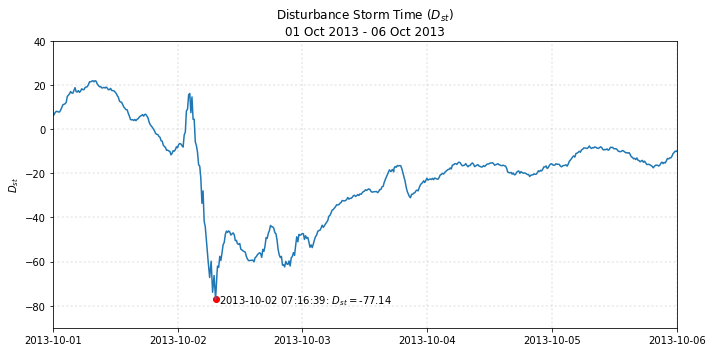

In [141]:
fig = plt.figure(figsize=[10,5])
ax = fig.add_subplot(111)

ax.plot(dt_l[:600],dst_l[:600])
plt.grid(b=True, which='major', color='grey', linewidth=0.25, linestyle=':')

mdidx = np.nanargmin(np.asarray(dst_l))
ax.scatter(dt_l[mdidx], dst_l[mdidx], marker='o', color = 'r')
# ax.annotate("{}: $D_{{st}} = ${:.2f}".format(dt_l[mdidx], dst_l[mdidx]), xy=(dt_l[mdidx], dst_l[mdidx]), xytext=(dt_l[mdidx+10], -78.5))
ax.annotate("{}: $D_{{st}} = ${:.2f}".format(dt_l[mdidx], dst_l[mdidx]), xy=(dt_l[mdidx], dst_l[mdidx]), xytext=(dt_l[mdidx+3], dst_l[mdidx]-2))
ax.set_title("Disturbance Storm Time ($D_{st}$)\n01 Oct 2013 - 06 Oct 2013")
ax.set_ylabel("$D_{st}$")
ax.set_xlim([datetime.datetime(2013,10,1,0,0,0), datetime.datetime(2013,10,6,0,0,0)])
ax.set_ylim([-90, 40])
fig.tight_layout()

fig.savefig(path+dstname+"Dst_plot.pdf")